In [6]:
#Adds higher directory to path, so we can access /ATS
import sys
sys.path.append("../")

from ATS.general import *
from ATS.QAQC import *

import pandas as pd

# Set the DataFram in pandas to show all columns and 1000 rows. Display plots inline
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)

In [7]:
validate_domains(feature_service)

NameError: name 'feature_service' is not defined

# Load data and subset

<Item title:"SAC_AWS_Habitat_Monitoring_RT" type:Feature Layer Collection owner:Anooshi>
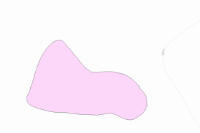

In [8]:
output = arcGIS_data_load('c3ffbf7e69604a3cb52fdd50fc07a054')

stations = output['data0']
observations = output['table0']
feature_service = output['feature_service']

In [9]:
# Merge related table and feature layer
data = stations.merge(observations, left_on='GlobalID', right_on='Ref_to_Stations', how='inner')
data = data.drop(columns=['GlobalID_x','OBJECTID_x','Ref_to_Stations'])
data = data.rename(columns={'GlobalID_y':'GlobalID', 'OBJECTID_y':'OBJECTID'})
data

,ID_Number,SHAPE,OBJECTID,TempShade,TempSun,ScrubHt,StructDiv,RockOC,CoyBrush,BareG,MamBurrow,Scrub,Grassland,ScrubSp1,ScrubSp2,ScrubSp3,PreyAbun1,PreySp1,PredAbun1,Surveyor_1,Surveyor_2,CloudCov,AirTemp,Wind,Azimuth,Site,Observation_Date,PreyAbund2,PreySp2,PreyAdund3,PreySp3,PredAbund2,PredSp2,PredAbund3,PredSp3,Comments,PredSp1,GlobalID,ScrubSpec1Per,ScrubSpe2Per,ScrubSpe3Per,PhotoAzimuth
0,5S-1a,"{'x': 6188486.713674307, 'y': 2035282.65514531...",1,76.0,101.0,3.00,2,0,0,1,3,75,25,Artemisia californica,None,None,4.0,Sceloporus occidentalis,3.0,Jackson Sabol,Rusty Hutto,0,78,13.0,149,SAC,2018-05-18 03:30:23,3.0,Thomomys bottae,1.0,Microtus californicus,1.0,Canis latrans,NaN,None,West facing slope. Steep cliff. Less than idea...,Buteo jamaicensis,326310e1-dc3f-4b37-a12d-bde5c454e061,100,0.0,None,"210, 149"
1,5S-1a,"{'x': 6188486.713674307, 'y': 2035282.65514531...",18,73.2,73.5,4.50,2,0,0,1,1,85,15,Artemisia californica,None,None,1.0,Thomomys bottae,1.0,Jackson Sabol,Janel Mayo,70,70,14.0,149,SAC,2019-05-15 00:20:45,1.0,Microtus californicus,NaN,None,NaN,None,NaN,None,West facing slope. Steep cliff. Less than idea...,Buteo jamaicensis,84e605d0-d5aa-4968-b366-d91b55f24783,100,0.0,None,"210, 149"
2,5S-1a,"{'x': 6188486.713674307, 'y': 2035282.65514531...",43,103.0,82.4,3.50,2,0,0,2,1,60,40,Artemisia californica,None,None,1.0,Thomomys bottae,1.0,Kurt Lutz,Brian Creeks,0,80,1.0,149,SAC,2021-05-26 16:49:50,NaN,None,NaN,None,NaN,None,NaN,None,West facing slope with a steep cliff. Not grea...,Canis latrans,68282b83-ab9b-45c3-bdb1-c181e4edd2bb,100,0.0,None,"210, 149"
3,5S-1b,"{'x': 6188569.041593641, 'y': 2035157.70952905...",2,76.0,101.0,3.00,2,0,0,1,3,75,25,Artemisia californica,None,None,4.0,Sceloporus occidentalis,3.0,Jackson Sabol,Rusty Hutto,0,78,15.0,320,SAC,2018-05-18 03:50:08,3.0,Thomomys bottae,1.0,Microtus californicus,1.0,Canis latrans,NaN,None,South facing slope. Steep cliff. Less than ide...,Buteo jamaicensis,22686028-5804-48a8-81ff-7342c704f5ab,100,0.0,None,320
4,5S-1b,"{'x': 6188569.041593641, 'y': 2035157.70952905...",19,73.2,73.5,4.50,2,0,0,1,1,85,15,Artemisia californica,None,None,1.0,Thomomys bottae,1.0,Jackson Sabol,Janel Mayo,70,70,14.0,320,SAC,2019-05-15 00:47:30,1.0,Microtus californicus,NaN,None,NaN,None,NaN,None,South facing slope. Steep cliff. Less than ide...,Buteo jamaicensis,175ed3d3-0c0b-4859-914a-bd257cd0043b,100,0.0,None,320
5,5S-1b,"{'x': 6188569.041593641, 'y': 2035157.70952905...",45,88.0,101.0,3.00,2,0,0,2,0,85,15,Artemisia californica,None,None,1.0,Thomomys bottae,1.0,Brian Creeks,Kurt Lutz,0,85,3.0,320,SAC,2021-05-26 17:18:23,NaN,None,NaN,None,NaN,None,NaN,None,South facing slope. Steep cliff. Less than ide...,Canis latrans,8f6d203d-59aa-4de8-be4c-055423691ed8,100,NaN,None,320
6,6N-1a,"{'x': 6189182.158477634, 'y': 2038339.05356006...",3,72.0,92.0,4.00,3,1,1,1,1,55,45,Artemisia californica,Baccharis pilularis,None,3.0,Sceloporus occidentalis,3.0,Jackson Sabol,Rusty Hutto,50,78,3.0,330,SAC,2018-05-19 00:48:36,1.0,Other,NaN,None,NaN,None,NaN,None,Other prey species: unknown rodent burrows in ...,Buteo jamaicensis,06edc5b1-970d-45a1-bf6a-7a00410f2c0d,95,5.0,None,330
7,6N-1a,"{'x': 6189182.158477634, 'y': 2038339.05356006...",29,84.3,88.7,4.00,3,1,1,1,1,55,45,Artemisia californica,Baccharis pilularis,None,3.0,Sceloporus occidentalis,3.0,Kevin Sherrill,Rusty Hutto,5,85,2.0,330,SAC,2019-05-30 01:35:07,1.0,Other,2.0,Microtus californicus,NaN,None,NaN,None,"Mostly sagebrush, dense hirschfeldia between. ...",Buteo jamaicensis,c6175781-a69b-49f9-8e36-f922180a94cf,95,5.0,None,330
8,6N-1a,"{'x': 6189182.158477634, 'y': 2038339.05356006...",44,90.6,115.0,4.50,3,1,1,1,1,60,40,Artemisia californica,Baccharis pilularis,None,3.0,Sceloporus occidentalis,4.0,Kurt Lutz,Brian Creeks,0,91,2.0,330,SAC,2021-05-26 18:55:49,1.0,Thomomys bottae,1.0,Microtus californicus,2.0,Falco sparverius,NaN,None,Mostly sagebrush with 2 large coyote brush. Co...,Buteo jamaicensis,3dc1f8fe-80e1-4e5b-a744-5516339e1eb7,95,5.0,None,330
9,6N

# Subset by year
data.rename(columns={"Datetime": "Observation_Date"}, inplace=True)
sYear = input("Start Year? (YYYY)")
sub = year_subset(data, sYear)

In [10]:
# Subset by year
data.rename(columns={"Datetime": "Observation_Date"}, inplace=True)
sYear = input("Start Year? (YYYY)")
sub = year_subset(data, sYear)

Start Year? (YYYY) 2020

Analysis for 2020-10-01 07:00 UTC to 2021-10-01 07:00 UTC
Entries in Subset: 17


# QAQC

In [57]:
QAQC_whitespace(data, exclude_cols=['Comments'])

Name of Object ID Column:  ['OBJECTID']


Analysis for: PreySp3
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: PhotoAzimuth
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: PredSp1
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: GlobalID
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: ScrubSpe3Per
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: ScrubSp2
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: ID_Number
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: PreySp1
No \xa0 characters found
No double spaces found

In [58]:
data.columns

Index(['ID_Number', 'SHAPE', 'OBJECTID', 'TempShade', 'TempSun', 'ScrubHt',
       'StructDiv', 'RockOC', 'CoyBrush', 'BareG', 'MamBurrow', 'Scrub',
       'Grassland', 'ScrubSp1', 'ScrubSp2', 'ScrubSp3', 'PreyAbun1', 'PreySp1',
       'PredAbun1', 'Surveyor_1', 'Surveyor_2', 'CloudCov', 'AirTemp', 'Wind',
       'Azimuth', 'Site', 'Observation_Date', 'PreyAbund2', 'PreySp2',
       'PreyAdund3', 'PreySp3', 'PredAbund2', 'PredSp2', 'PredAbund3',
       'PredSp3', 'Comments', 'PredSp1', 'GlobalID', 'ScrubSpec1Per',
       'ScrubSpe2Per', 'ScrubSpe3Per', 'PhotoAzimuth'],
      dtype='object')

In [59]:
# QAQC Find blank entries
find_blank_entries(data, exclude_cols=['PredAbun1','ScrubSp3','PreyAdund3','PreySp3','PredAbund2','PredSp3','PredAbund3',
                                      'Azimuth','PreyAbun1','PredSp2','PreySp2','ScrubSpe2Per','ScrubSp2','PreyAbund2',
                                      'ScrubSpe3Per'])

Blank Wind entrie(s) exist!


,ID_Number,SHAPE,OBJECTID,TempShade,TempSun,ScrubHt,StructDiv,RockOC,CoyBrush,BareG,MamBurrow,Scrub,Grassland,ScrubSp1,ScrubSp2,ScrubSp3,PreyAbun1,PreySp1,PredAbun1,Surveyor_1,Surveyor_2,CloudCov,AirTemp,Wind,Azimuth,Site,Observation_Date,PreyAbund2,PreySp2,PreyAdund3,PreySp3,PredAbund2,PredSp2,PredAbund3,PredSp3,Comments,PredSp1,GlobalID,ScrubSpec1Per,ScrubSpe2Per,ScrubSpe3Per,PhotoAzimuth
44,7N-3b,"{'x': 6185103.509810805, 'y': 2037608.514010638, 'spatialReference...",39,84.3,98.6,5.0,3,1,1,3,1,90,10,Artemisia californica,Baccharis pilularis,None,NaN,None,1.0,Brian Creeks,Kurt Lutz,0,85,NaN,40340,SAC,2021-05-25 19:07:46,NaN,None,NaN,None,3.0,Other (see comments),NaN,None,Leading edge of patch at base of hill has lots of new sagebrush sp...,Canis latrans,9fdb4375-ab11-4419-86fd-825ef4a79714,99,1.0,None,"40, 340"


No blank TempShade
No blank PhotoAzimuth
No blank Grassland
No blank CoyBrush
No blank BareG
No blank OBJECTID
No blank TempSun
No blank ScrubHt
No blank Observation_Date
No blank Scrub
No blank ID_Number
Blank PreySp1 entrie(s) exist!


,ID_Number,SHAPE,OBJECTID,TempShade,TempSun,ScrubHt,StructDiv,RockOC,CoyBrush,BareG,MamBurrow,Scrub,Grassland,ScrubSp1,ScrubSp2,ScrubSp3,PreyAbun1,PreySp1,PredAbun1,Surveyor_1,Surveyor_2,CloudCov,AirTemp,Wind,Azimuth,Site,Observation_Date,PreyAbund2,PreySp2,PreyAdund3,PreySp3,PredAbund2,PredSp2,PredAbund3,PredSp3,Comments,PredSp1,GlobalID,ScrubSpec1Per,ScrubSpe2Per,ScrubSpe3Per,PhotoAzimuth
44,7N-3b,"{'x': 6185103.509810805, 'y': 2037608.514010638, 'spatialReference...",39,84.3,98.6,5.0,3,1,1,3,1,90,10,Artemisia californica,Baccharis pilularis,None,NaN,None,1.0,Brian Creeks,Kurt Lutz,0,85,NaN,40340,SAC,2021-05-25 19:07:46,NaN,None,NaN,None,3.0,Other (see comments),NaN,None,Leading edge of patch at base of hill has lots of new sagebrush sp...,Canis latrans,9fdb4375-ab11-4419-86fd-825ef4a79714,99,1.0,None,"40, 340"


No blank Surveyor_2
No blank Surveyor_1
No blank RockOC
No blank ScrubSp1
No blank MamBurrow
Blank PredSp1 entrie(s) exist!


,ID_Number,SHAPE,OBJECTID,TempShade,TempSun,ScrubHt,StructDiv,RockOC,CoyBrush,BareG,MamBurrow,Scrub,Grassland,ScrubSp1,ScrubSp2,ScrubSp3,PreyAbun1,PreySp1,PredAbun1,Surveyor_1,Surveyor_2,CloudCov,AirTemp,Wind,Azimuth,Site,Observation_Date,PreyAbund2,PreySp2,PreyAdund3,PreySp3,PredAbund2,PredSp2,PredAbund3,PredSp3,Comments,PredSp1,GlobalID,ScrubSpec1Per,ScrubSpe2Per,ScrubSpe3Per,PhotoAzimuth
29,7N-1a,"{'x': 6184817.010055721, 'y': 2037532.84257406, 'spatialReference'...",41,86.2,96.7,4.5,3,0,0,1,1,80,20,Artemisia californica,None,None,2.0,Sceloporus occidentalis,NaN,Brian Creeks,Kurt Lutz,0,86,8.0,38,SAC,2021-05-25 20:07:01,1.0,Thomomys bottae,NaN,None,NaN,None,NaN,None,Steep slopes with bare ground.,None,a57b5e85-b28c-4709-84b6-dcebebd6ac9b,100,NaN,None,38
32,7N-1b,"{'x': 6184867.667762801, 'y': 2037634.0992613137, 'spatialReferenc...",38,87.2,91.8,3.5,3,1,0,1,1,25,75,Artemisia californica,None,None,1.0,Sceloporus occidentalis,NaN,Kurt Lutz,Brian Creeks,0,87,3.0,270,SAC,2021-05-25 20:21:01,1.0,Microtus californicus,1.0,Thomomys bottae,NaN,None,NaN,None,Take photo for 7N-2C from here too. Sage is very sparse along ridg...,None,c88734b5-c7fe-4949-97e6-b67d3c2c485d,100,0.0,None,"270, 255"
38,7N-2b,"{'x': 6184849.262615889, 'y': 2037522.9751397222, 'spatialReferenc...",40,87.2,96.4,4.5,2,0,0,1,1,80,20,Artemisia californica,None,None,1.0,Thomomys bottae,NaN,Brian Creeks,Kurt Lutz,0,86,6.0,180000,SAC,2021-05-25 19:58:24,NaN,None,NaN,None,NaN,None,NaN,None,Azimuths same as previous years.,None,e177d649-1f75-4582-9754-158984284b9a,100,NaN,None,"0, 180"


No blank GlobalID
No blank AirTemp
No blank CloudCov
No blank StructDiv
No blank Site
No blank ScrubSpec1Per
No blank SHAPE
No blank Comments


TypeError: 'DataFrame' object is not callable

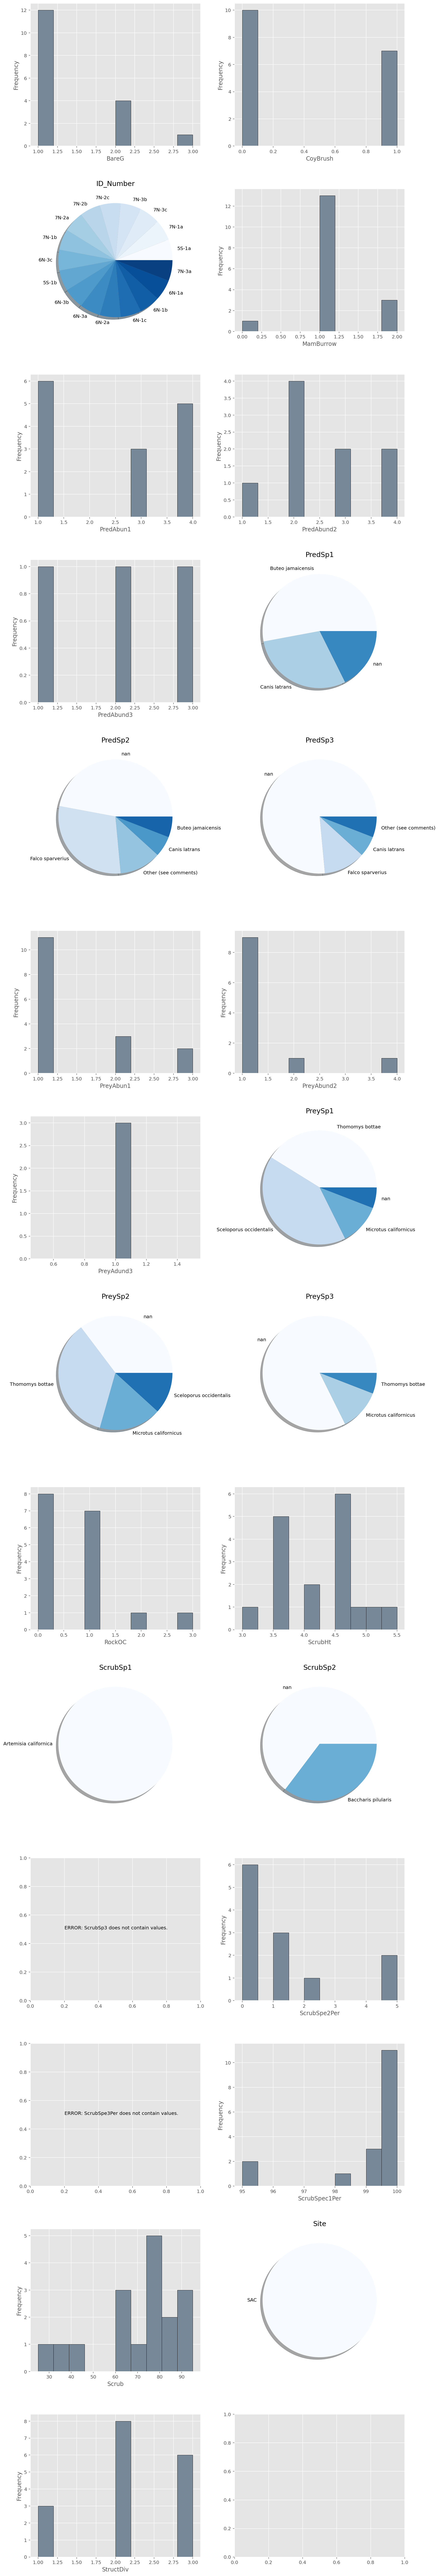

In [11]:
QAQC_plot(sub, [ 'BareG',
       'CoyBrush',  'ID_Number',
       'MamBurrow',  'PredAbun1', 'PredAbund2',
       'PredAbund3', 'PredSp1', 'PredSp2', 'PredSp3', 'PreyAbun1',
       'PreyAbund2', 'PreyAdund3', 'PreySp1', 'PreySp2', 'PreySp3', 'RockOC',
        'ScrubHt', 'ScrubSp1', 'ScrubSp2', 'ScrubSp3',
       'ScrubSpe2Per', 'ScrubSpe3Per', 'ScrubSpec1Per', 'Scrub', 'Site',
       'StructDiv'])

In [63]:
data.head()

,ID_Number,SHAPE,OBJECTID,TempShade,TempSun,ScrubHt,StructDiv,RockOC,CoyBrush,BareG,MamBurrow,Scrub,Grassland,ScrubSp1,ScrubSp2,ScrubSp3,PreyAbun1,PreySp1,PredAbun1,Surveyor_1,Surveyor_2,CloudCov,AirTemp,Wind,Azimuth,Site,Observation_Date,PreyAbund2,PreySp2,PreyAdund3,PreySp3,PredAbund2,PredSp2,PredAbund3,PredSp3,Comments,PredSp1,GlobalID,ScrubSpec1Per,ScrubSpe2Per,ScrubSpe3Per,PhotoAzimuth
0,5S-1a,"{'x': 6188486.713674307, 'y': 2035282.6551453173, 'spatialReferenc...",1,76.0,101.0,3.0,2,0,0,1,3,75,25,Artemisia californica,None,None,4.0,Sceloporus occidentalis,3.0,Jackson Sabol,Rusty Hutto,0,78,13.0,149,SAC,2018-05-18 03:30:23,3.0,Thomomys bottae,1.0,Microtus californicus,1.0,Canis latrans,NaN,None,West facing slope. Steep cliff. Less than ideal AWS habitat,Buteo jamaicensis,326310e1-dc3f-4b37-a12d-bde5c454e061,100,0.0,None,"210, 149"
1,5S-1a,"{'x': 6188486.713674307, 'y': 2035282.6551453173, 'spatialReferenc...",18,73.2,73.5,4.5,2,0,0,1,1,85,15,Artemisia californica,None,None,1.0,Thomomys bottae,1.0,Jackson Sabol,Janel Mayo,70,70,14.0,149,SAC,2019-05-15 00:20:45,1.0,Microtus californicus,NaN,None,NaN,None,NaN,None,West facing slope. Steep cliff. Less than ideal AWS habitat. Cattl...,Buteo jamaicensis,84e605d0-d5aa-4968-b366-d91b55f24783,100,0.0,None,"210, 149"
2,5S-1a,"{'x': 6188486.713674307, 'y': 2035282.6551453173, 'spatialReferenc...",43,103.0,82.4,3.5,2,0,0,2,1,60,40,Artemisia californica,None,None,1.0,Thomomys bottae,1.0,Kurt Lutz,Brian Creeks,0,80,1.0,149,SAC,2021-05-26 16:49:50,NaN,None,NaN,None,NaN,None,NaN,None,West facing slope with a steep cliff. Not great AWS habitat due to...,Canis latrans,68282b83-ab9b-45c3-bdb1-c181e4edd2bb,100,0.0,None,"210, 149"
3,5S-1b,"{'x': 6188569.041593641, 'y': 2035157.7095290571, 'spatialReferenc...",2,76.0,101.0,3.0,2,0,0,1,3,75,25,Artemisia californica,None,None,4.0,Sceloporus occidentalis,3.0,Jackson Sabol,Rusty Hutto,0,78,15.0,320,SAC,2018-05-18 03:50:08,3.0,Thomomys bottae,1.0,Microtus californicus,1.0,Canis latrans,NaN,None,South facing slope. Steep cliff. Less than ideal AWS habitat,Buteo jamaicensis,22686028-5804-48a8-81ff-7342c704f5ab,100,0.0,None,320
4,5S-1b,"{'x': 6188569.041593641, 'y': 2035157.7095290571, 'spatialReferenc...",19,73.2,73.5,4.5,2,0,0,1,1,85,15,Artemisia californica,None,None,1.0,Thomomys bottae,1.0,Jackson Sabol,Janel Mayo,70,70,14.0,320,SAC,2019-05-15 00:47:30,1.0,Microtus californicus,NaN,None,NaN,None,NaN,None,South facing slope. Steep cliff. Less than ideal AWS habitat. Catt...,Buteo jamaicensis,175ed3d3-0c0b-4859-914a-bd257cd0043b,100,0.0,None,320


NameError: name 'mean' is not defined

ERROR: PredAbund3 does not contain values.
ERROR: PredSp3 does not contain values.
ERROR: ScrubSp3 does not contain values.


ERROR: ScrubSpe3Per does not contain values.


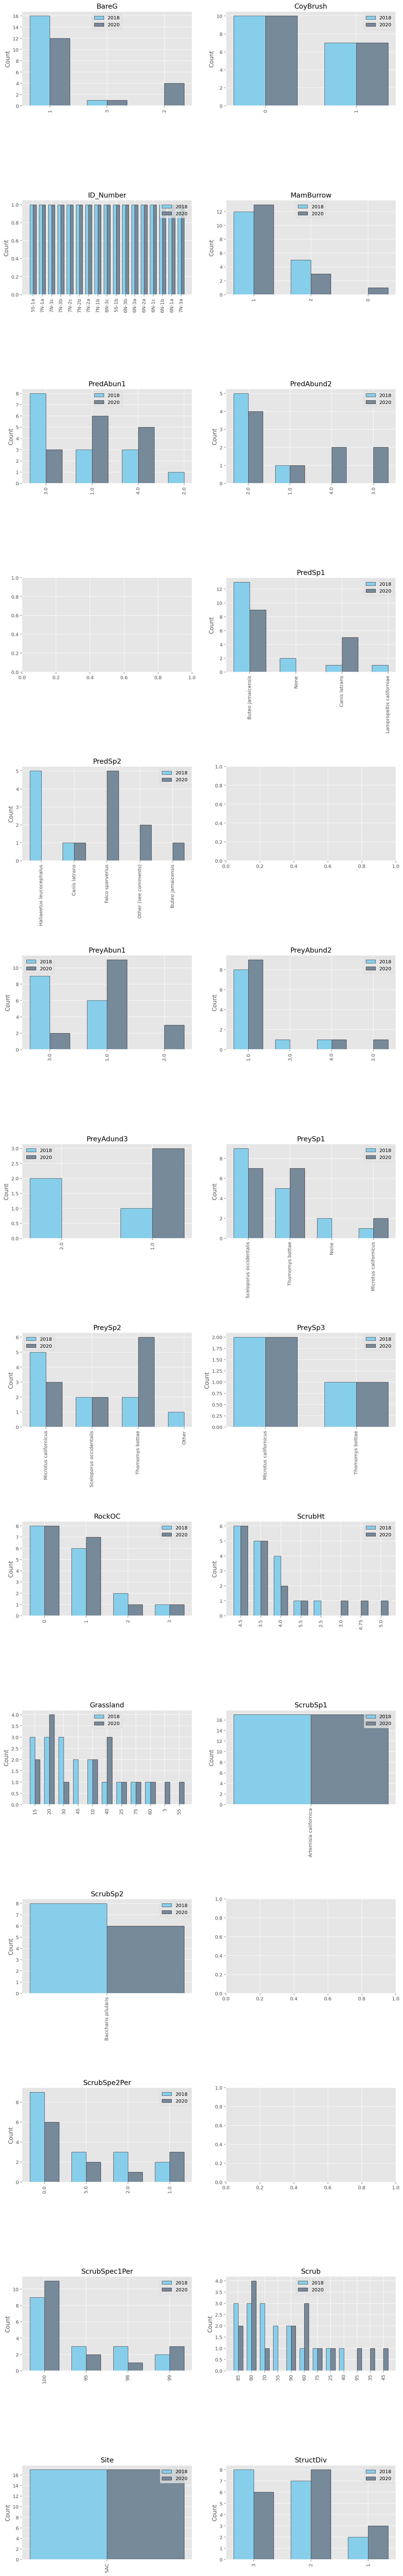

In [14]:
compare_years_catagorical(data, [ 'BareG', 
       'CoyBrush',  'ID_Number',
       'MamBurrow',  'PredAbun1', 'PredAbund2',
       'PredAbund3', 'PredSp1', 'PredSp2', 'PredSp3', 'PreyAbun1',
       'PreyAbund2', 'PreyAdund3', 'PreySp1', 'PreySp2', 'PreySp3', 'RockOC',
        'ScrubHt', 'Grassland', 'ScrubSp1', 'ScrubSp2', 'ScrubSp3',
       'ScrubSpe2Per', 'ScrubSpe3Per', 'ScrubSpec1Per', 'Scrub', 'Site',
       'StructDiv'], '2018','2020')

Dropping surveyors with less than 0.0 observations
They did not make over 0% of total observation
Dropping Surveyors: []


/tmp/ipykernel_1449/1867244266.py:1: RankWarning: Polyfit may be poorly conditioned
  compare_surveyors(sub, 'StructDiv', obs_var='Surveyor_1', drop=0)
/tmp/ipykernel_1449/1867244266.py:1: RankWarning: Polyfit may be poorly conditioned
  compare_surveyors(sub, 'StructDiv', obs_var='Surveyor_1', drop=0)


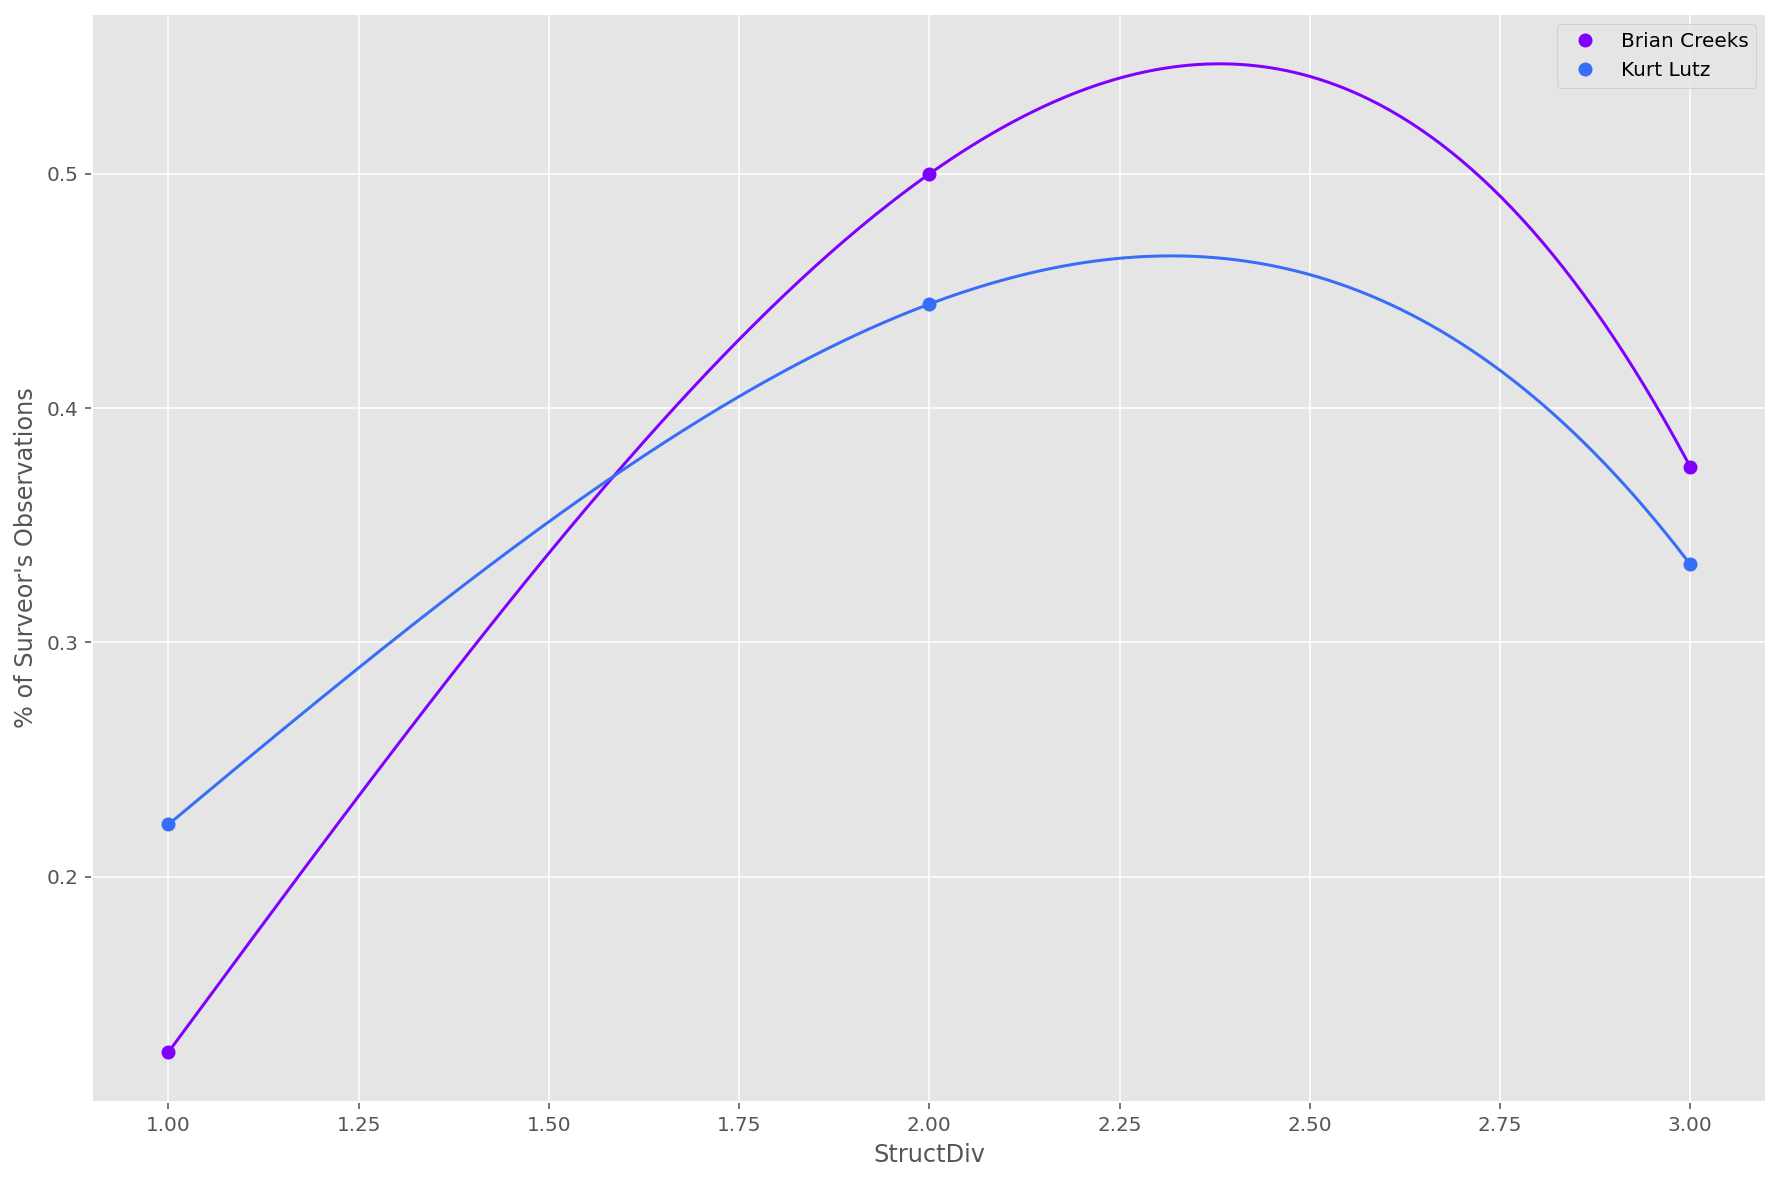

Dropping surveyors with less than 0.0 observations
They did not make over 0% of total observation
Dropping Surveyors: []


/tmp/ipykernel_1449/1867244266.py:2: RankWarning: Polyfit may be poorly conditioned
  compare_surveyors(sub, 'StructDiv', obs_var='Surveyor_2', drop=0)
/tmp/ipykernel_1449/1867244266.py:2: RankWarning: Polyfit may be poorly conditioned
  compare_surveyors(sub, 'StructDiv', obs_var='Surveyor_2', drop=0)


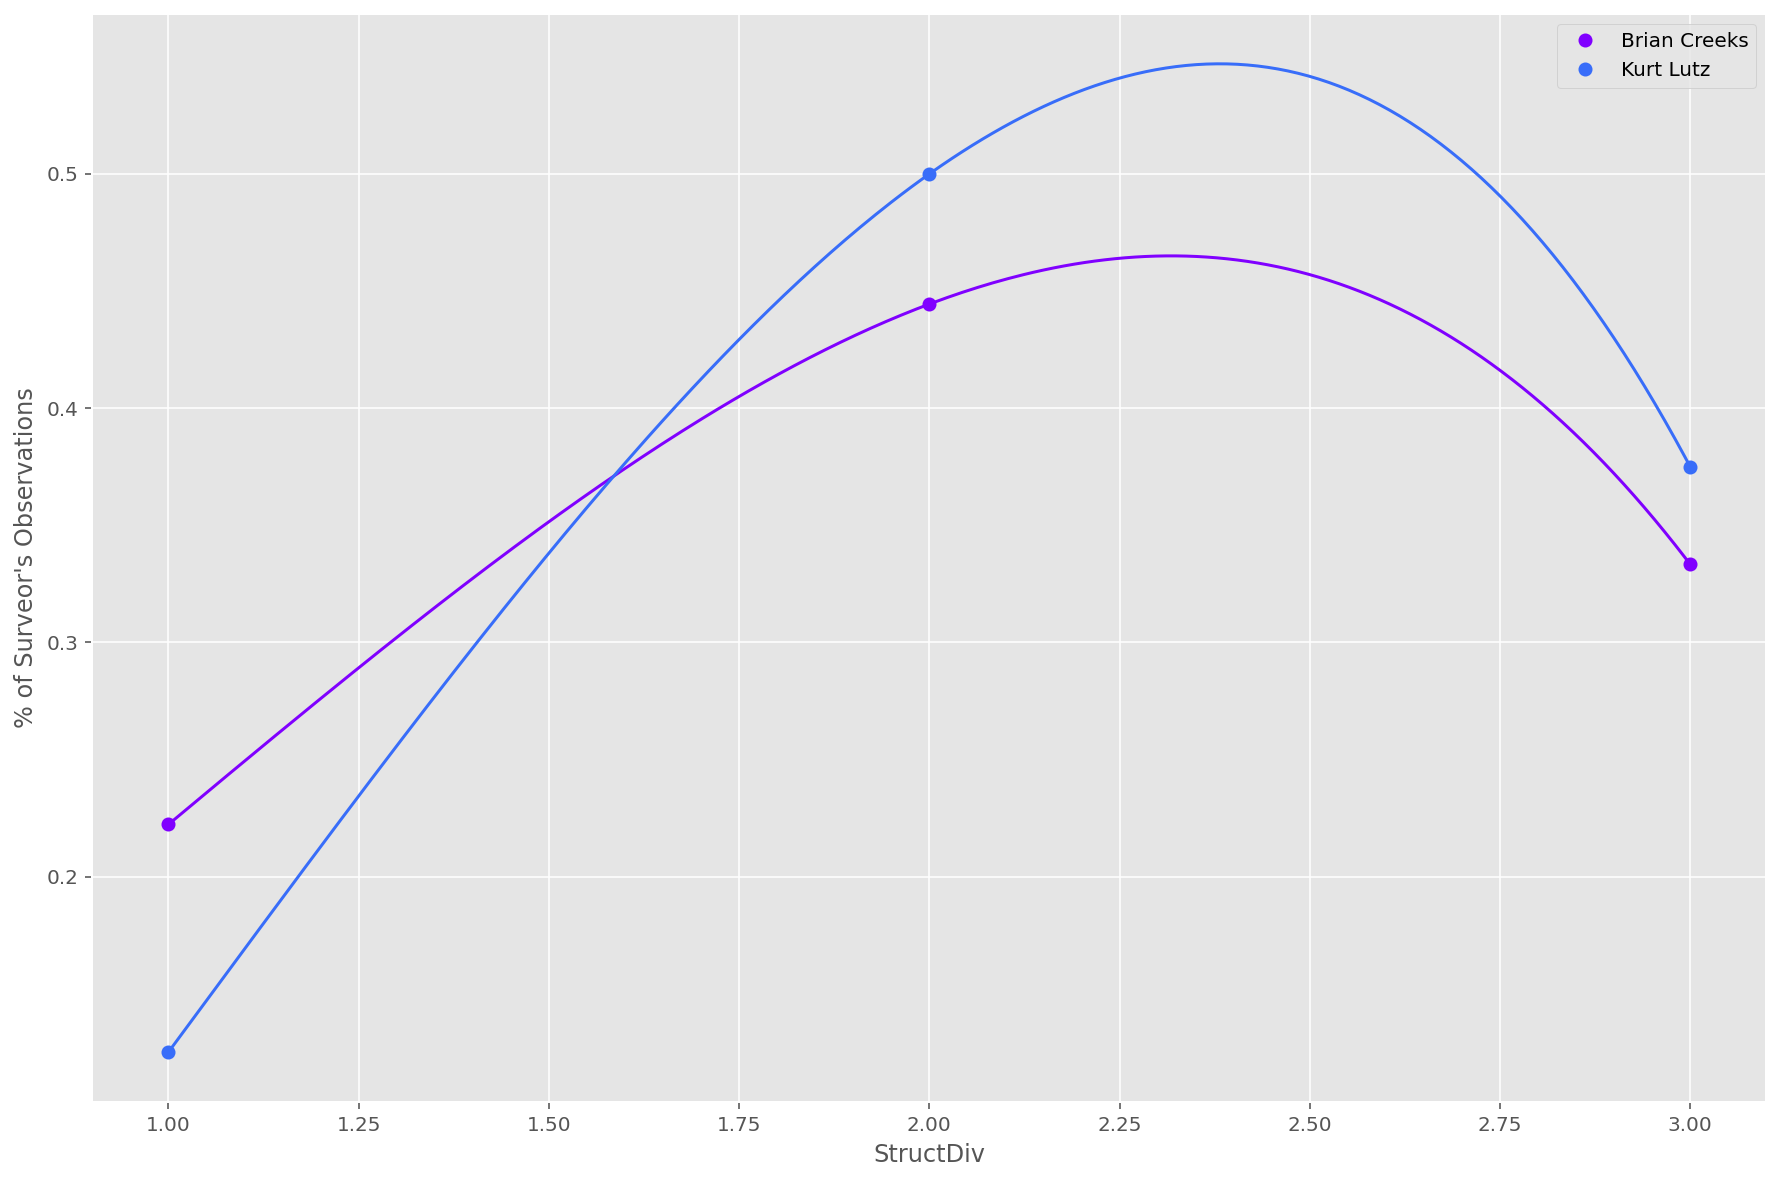

In [68]:
compare_surveyors(sub, 'StructDiv', obs_var='Surveyor_1', drop=0)
compare_surveyors(sub, 'StructDiv', obs_var='Surveyor_2', drop=0)

# Export Excel Data Deliverable

NameError: name 'mean' is not defined

In [78]:
field_order = ([
    'Site',
    'Observation_Date',
    'Surveyor_1',
    'Surveyor_2',
    'ID_Number',
    'CloudCov',
    'Wind',
    'AirTemp',
    'TempShade',
    'TempSun',
    'ScrubHt',
    'StructDiv',
    'RockOC',
    'CoyBrush',
    'BareG',
    'MamBurrow',
    'ScrubSp1',
    'ScrubSpec1Per',
    'ScrubSp2',
    'ScrubSpe2Per',
    'ScrubSp3',
    'ScrubSpe3Per',
    'Scrub',
    'Grassland',
    'PreySp1',
    'PreyAbun1',
    'PreySp2',
    'PreyAbund2',
    'PreySp3',
    'PreyAdund3',
    'PredSp1',
    'PredAbun1',
    'PredSp2', 
    'PredAbund2',
    'PredSp3',
    'PredAbund3',        
    'Azimuth', 
    'PhotoAzimuth',
    'Comments', 
    'OBJECTID',
    'GlobalID',
    'SHAPE'
])

In [70]:
QAQC_attachment_filenames(feature_service)


No attachments for layer/table Stations



No mislabeled photos found for layer/table Observations


In [80]:
export_data_deliverable(data, feature_service, field_order,file_name='SAC_AWS_Habitat_Monitoring')

Exported to Outputs/SAC_AWS_Habitat_Monitoring_Data_20210920.xlsx
